## SAM masks
- multiple masks of SAM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


from segment_anything import sam_model_registry, SamPredictor


MIN_TO_COUNT_AS_LABEL = 0.01

In [ ]:
def load_logits( seg_path):
    # Load logits from the specified path
    logits = torch.load(seg_path)   
    print(logits.shape) 

    # Check if the shape matches the expected shape
    if logits.shape == torch.Size([1, 19, 128, 128]):
        logits = logits.float()  # Convert to 'float' data type
        logits = F.softmax(logits, dim=1)
        
        # Upsample the logits to match the image shape
        upsampled_logits = logits #nn.functional.interpolate(logits, size=img_shape, mode='bilinear', align_corners=False)
        # Get both the maximum probabilities and their corresponding labels
        max_probs, labels = torch.max(upsampled_logits, dim=1)
        label = labels[0]  # Extract the most probable label matrix
        prob = max_probs[0]  # Extract the probability matrix corresponding to the most probable labels
    
        return logits,label, prob  # Return both the label matrix and the probability matrix

In [ ]:
path_seg=  "image.pt"
path_img = "image.jpg"

In [ ]:
sam_checkpoint = "../models/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)

In [18]:
im = Image.open(path_img)
hwc = np.array(im)
predictor.set_image(hwc)

In [59]:
input_point = np.array([[[200, 200]], [[300, 300]]])
input_label = np.array([1])


masks_points = []
scores_points = []
for p in input_point:
    print(p)
    masks, scores, logits = predictor.predict(
        point_coords=p,
        point_labels=input_label,
        multimask_output=True,
    )

    masks_points.append(masks)
    scores_points.append(scores)

[[200 200]]
[[300 300]]


(1200, 1600)


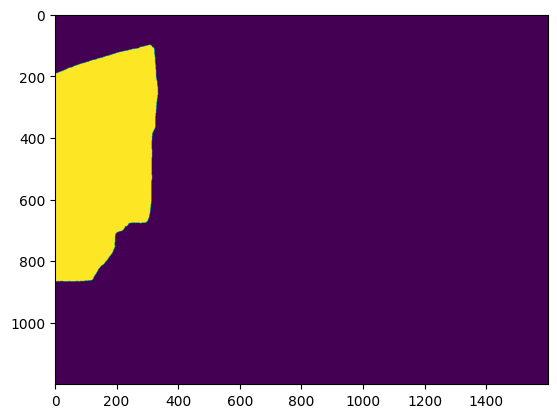

(1200, 1600)


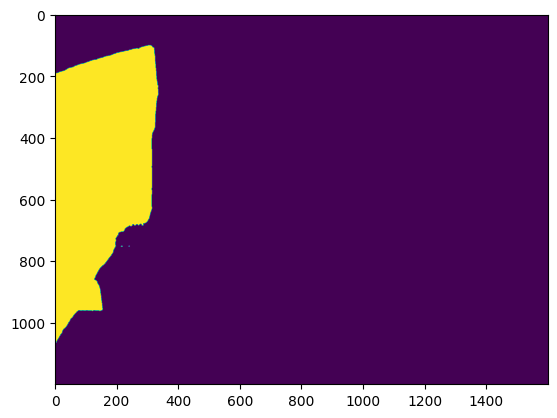

(1200, 1600)


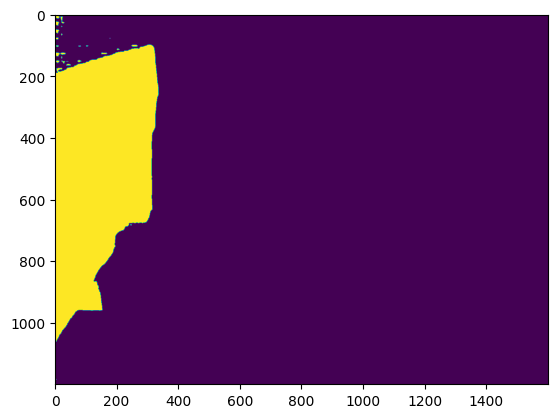

In [65]:
# print all the masks
len(masks.shape)
for mask in masks:
    print(mask.shape)
    plt.imshow(mask)
    plt.show()